# Feed Forward Neural Network 

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Dense #type:ignore
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Preparation

### Load and Spliting the data

In [2]:
X,y = make_classification(
    n_samples = 1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Data preprocessing

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Making

### Loading the model

In [5]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])

### Compiling the model

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training the model

In [8]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)


Epoch 1/20


20/20 [==============================] - 3s 23ms/step - loss: 0.6605 - accuracy: 0.5906 - val_loss: 0.5898 - val_accuracy: 0.7563
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5351 - accuracy: 0.8047 - val_loss: 0.4983 - val_accuracy: 0.8438
Epoch 3/20
20/20 [==============================] - 0s 6ms/step - loss: 0.4395 - accuracy: 0.8641 - val_loss: 0.4265 - val_accuracy: 0.8375
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 0.3586 - accuracy: 0.8953 - val_loss: 0.3714 - val_accuracy: 0.8562
Epoch 5/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.9094 - val_loss: 0.3325 - val_accuracy: 0.8813
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2549 - accuracy: 0.9234 - val_loss: 0.3016 - val_accuracy: 0.8750
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 0.2226 - accuracy: 0.9312 - val_loss: 0.2747 - val_accuracy: 0.8938
Epoch 8/20
20/20 

### Validation and evaluation

In [10]:
test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose = 0)
print(f"Test Accuracy : {test_accuracy*100:.2f}%")

Test Accuracy : 93.50%


In [11]:
predictions = (model.predict(X_test)>0.5).astype('int32')
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy score : {accuracy*100:.2f}%")

7/7 [==============================] - 0s 3ms/step
Accuracy score : 93.50%


## Visualization

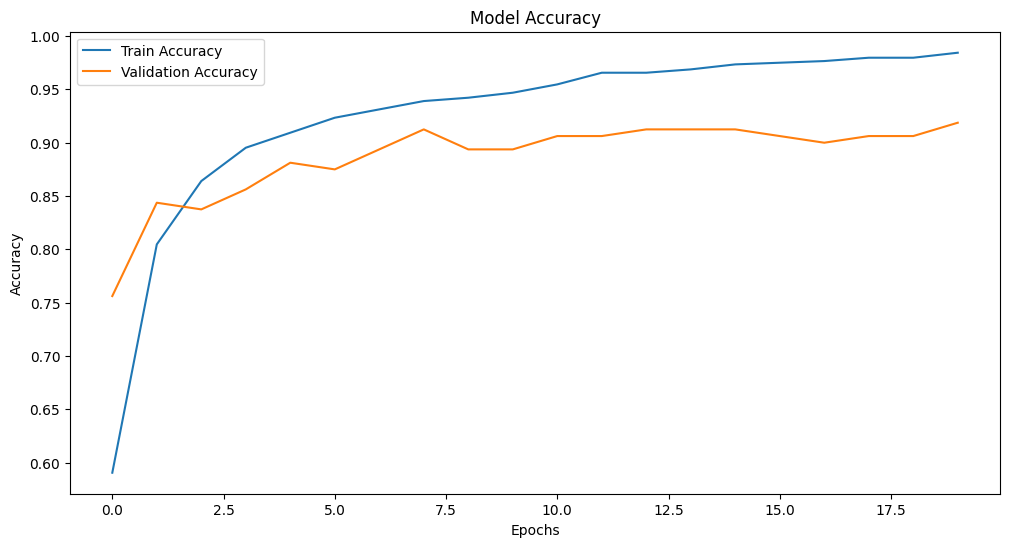

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()